# Preparing Data

In [1]:
# import all dependecies
import os
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [9]:
(x_train_raw, y_train_raw), (x_test_raw, y_test_raw) = keras.datasets.mnist.load_data()

print(y_train_raw[0])
print(x_train_raw.shape, y_train_raw.shape)
print(x_test_raw.shape, y_test_raw.shape)

5
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
'''
    Convert label into one hot code
    Goal --> to make probabilities calculation run indepently
'''

num_class = 10

y_train = keras.utils.to_categorical(y_train_raw, num_class)
y_test = keras.utils.to_categorical(y_test_raw, num_class)

print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


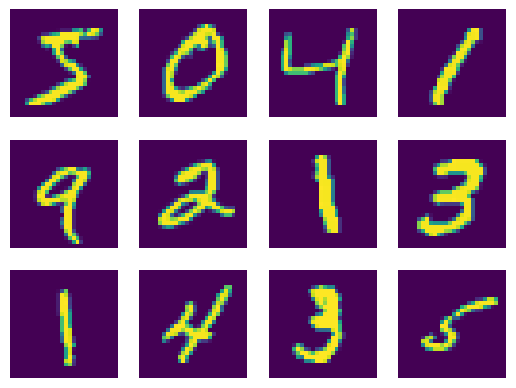

In [21]:
plt.figure()
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(x_train_raw[i])
    plt.axis("off")
plt.show()

In [23]:
# reshape image matrix into 1 vector
# sesuai dengan dimensi data yang digunakan untuk training model
x_train = x_train_raw.reshape(60000, 784)
x_test = x_test_raw.reshape(10000, 784)

In [26]:
# normalize image pixel into range 0 - 1
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [28]:
# Build Model Layers
model = tf.keras.Sequential()

# First Block Layer
model.add(keras.layers.Conv2D(
    filters = 32,
    kernel_size = 5,
    strides = (1, 1),
    padding = "same",
    activation = "relu",
    input_shape = (28, 28, 1)
))

model.add(keras.layers.MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2),
    padding = "valid"
))

# Second Block Layer
model.add(keras.layers.Conv2D(
    filters = 64,
    kernel_size = 3,
    strides = (1, 1),
    padding = "same",
    activation = "relu"
))

model.add(keras.layers.MaxPooling2D(
    pool_size = (2, 2),
    strides = (2, 2),
    padding = "valid"
))

# Add Dropout Regularization
model.add(keras.layers.Dropout(0.25))

# Flatten
model.add(keras.layers.Flatten())

# Add fully connected layer
model.add(keras.layers.Dense(
    units = 128,
    activation = "relu"
))

model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(
    units = 10,
    activation = "softmax"
))

In [29]:
# Reshape data dimension
X_train = x_train.reshape(60000, 28, 28, 1)
X_test = x_test.reshape(10000, 28, 28, 1)

In [30]:
# Compile the model
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [31]:
# Fit the model
model.fit(
    x = X_train,
    y = y_train,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5


469/469 [==============================] - 55s 113ms/step - loss: 0.2739 - accuracy: 0.9162
Epoch 2/5
469/469 [==============================] - 48s 103ms/step - loss: 0.0935 - accuracy: 0.9722
Epoch 3/5
469/469 [==============================] - 73s 156ms/step - loss: 0.0694 - accuracy: 0.9799
Epoch 4/5
469/469 [==============================] - 70s 150ms/step - loss: 0.0572 - accuracy: 0.9832
Epoch 5/5
469/469 [==============================] - 60s 128ms/step - loss: 0.0480 - accuracy: 0.9855


In [32]:
# Evaluate CNN Model
test_loss, test_acc = model.evaluate(x = X_test, y = y_test)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 4s 12ms/step - loss: 0.0258 - accuracy: 0.9914
Test loss: 0.025814635679125786
Test accuracy: 0.9914000034332275


In [33]:
# save the model
model.save("final_CNN_model.h5")

c:\Users\andndre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [34]:
# Load model and predict
from tensorflow import keras
new_model = keras.models.load_model("final_CNN_model.h5")
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 64)          0         
                                                                 
 flatten (Flatten)           (None, 3136)             

In [43]:
# visualize prediction results
def res_Visual(total_prediction):
    print(X_test)
    final_opt_a = new_model.predict(X_test[0:total_prediction])
    final_opt_a = final_opt_a.argmax(axis=-1)
    fig, ax = plt.subplots(nrows=int(total_prediction/5), ncols=5)
    ax = ax.flatten()
    print("Prediction results of the first {} images: ".format(total_prediction))
    for i in range(total_prediction):
        print(final_opt_a[i], end = ",")
        if int((i + 1) % 5) == 0:
            print("\t")

        # visualize image display
        img = X_test[i].reshape((28, 28))
        plt.axis("off")
        ax[i].imshow(img, cmap = "Greys", interpolation = "nearest") # Visualization
        ax[i].axis("off")
    print("first {} images in the test set: ".format(total_prediction))

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

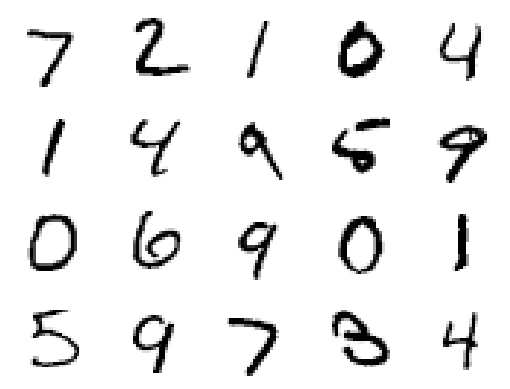

In [44]:
# call the procedur to visualize the twenty-first actual images and prediction
res_Visual(20)

313/313 [==============================] - 4s 11ms/step
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



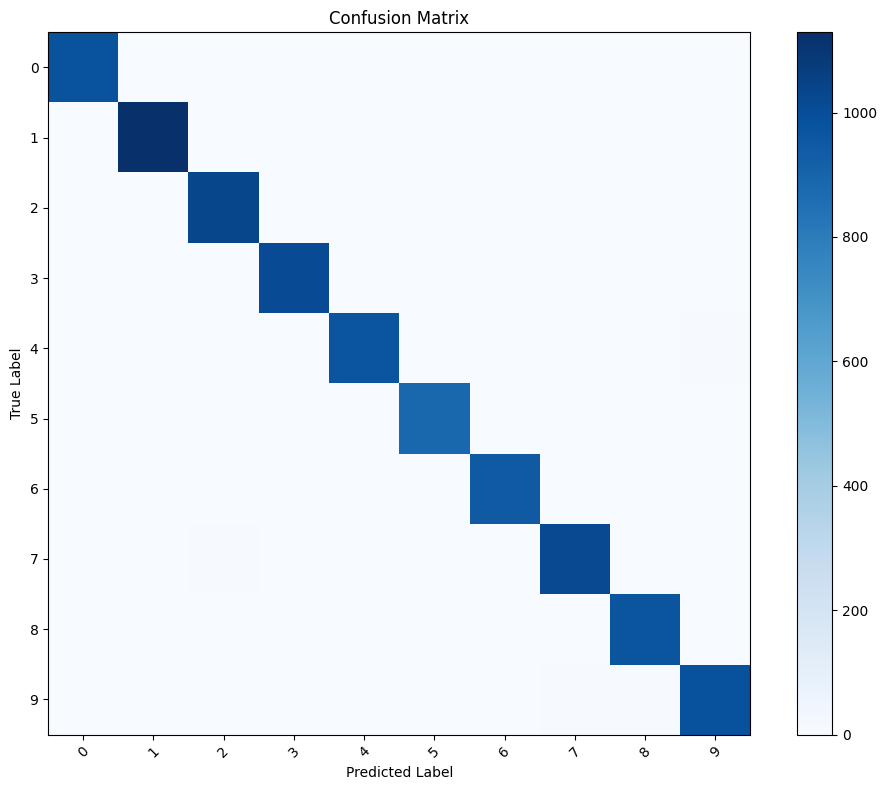

In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report


# Make predictions
y_true = np.argmax(y_test, axis=1) # convert one hot encoding label into indivdual integer number
# print(y_true)
y_pred_prob = new_model.predict(X_test, verbose=1)
y_pred = y_pred_prob.argmax(axis=-1)

# Create confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print classification report
target_names = np.unique(y_true).astype(str) # get class name by get the unique class id, then convert it into string for plot requirement
print(target_names)
print(classification_report(y_true, y_pred, target_names=target_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()